# Ejercicio 3: Producción

Diego R. Páez Ardila

Una empresa produce **dos productos diferentes** y tiene una **fábrica con tres sectores independientes**. El equipo de marketing de la empresa se dio cuenta de que había una capacidad improductiva en cada uno de los sectores de la fábrica de **4, 12 y 18 horas respectivamente**. Cada producto consume un determinado número de horas en cada sector de la fábrica, como se muestra en la siguiente tabla.

<img src="sectores_fabrica.png" width="600">

El departamento de marketing informa que el lote del **producto 1 tiene una ganancia de $3000 US**D mientras que el **producto 2 es de $5000 USD**. Además, la demanda es mayor que la capacidad productiva de los sectores y que los dos productos disputan la capacidad productiva de la fábrica.

>:question: ¿Cual es la mejor estrategia de producción para que la empresa maximice sus ganancias?

Restricciones:

- El número máximo de lotes a ser producidos de cada producto es igual a 10. 
- La producción del producto 1 pasa por los sectores 1 y 3 de la fabrica, y el producto 2 pasa por los sectores 2 y 3. 
- La producción no puede consumir mas de 4 horas en el sector 1 de la fabrica. 
- El producto 2 consume 2 horas de el sector 2 de la fabrica, pero la producción no puede pasar 12 horas de dicho sector.
- El producto 1 consume 3 horas del sector 3 y el producto 2 consume 2 horas del sector 3. La producción del sector tres no puede pasar las 18 horas.




## Variables de decisión

* $X1 = $ Cantidad de unidades del **producto 1**;
* $X2 = $ Cantidad de unidades del **producto 2**;
* $Z = $ lucro total obtenido con la producción.

**Restricciones**:

* Disponibilidad del sector 1;
* Disponibilidad del sector 2;
* Disponibilidad del sector 3;
* Indiviudos no pueden ser negativos.

**Objetivo**

Maximizar el lucro total de la empresa

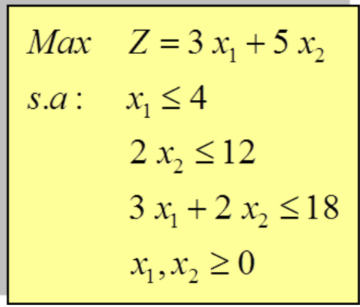

## Instalación de Paquetes

In [1]:
# https://deap.readthedocs.io/en/master/
!pip install deap

In [2]:
# Librerias
import random
import numpy as np
from deap import algorithms, base, creator, tools

## Preparación para Optimización

1. **Función objetivo**:
2. **Variables de decisión**
3. **Operadores**

In [3]:
"""
Función objetivo
"""
def objective_function(individual):
  """
  Calcula el desempeño de cada individuo

  Args:
      individual (List): Individuo generado por el AG

  Returns:
      Tuple: Resultado de la evaluación del individuo
  """
  return (individual[0]*3 + individual[1]*5),

In [4]:
"""
Viabilidad del Individuo
"""
def feasible(individual):
  if individual[0]*1 > 4:
    return False
  if individual[1]*2  > 12:
    return False
  if individual[0]*3 + individual[1]*2 > 18:
    return False
  return True


In [5]:
"""
Restricciones
"""
def distance(individual):
  """
  Restricciones que se deben cumplir durante la optimización

  Args:
      individual (List): Individuo generado por el AG

  Returns:
      Tuple: Sumatoria de restricciones
  """
  constraint1 = abs(individual[0]*1 - 4)
  constraint2 = abs(individual[1]*2 - 12)
  constraint3 = abs(individual[0]*3 + individual[1]*2 - 18)
  return constraint1 + constraint2 + constraint3

In [6]:
# Creación estructura de fitness e individuo
##para problema de maximización el peso es positivo y minimización el peso es negativo
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) 
creator.create("Individual",list, fitness=creator.FitnessMax)

In [7]:
toolbox = base.Toolbox()

# Generador de atributos reales: nombre, función que genera cada variable, intervalo (limite superior e inferior)
toolbox.register("attr_int", random.randint, 0, 100)

# Generador de individuo
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, 2)

# Generar la población

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [8]:
#Inicializar Operadores: https://deap.readthedocs.io/en/master/api/tools.html
toolbox.register("evaluate",objective_function)
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 0, distance))
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=100, indpb=0.05)
toolbox.register("select",tools.selTournament, tournsize=3)

In [9]:
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

## Ciclo evolutivo


In [10]:
pop, log =algorithms.eaSimple(population=pop, 
                              toolbox=toolbox, 
                              cxpb=0.5, 
                              mutpb=0.1, 
                              ngen=100, 
                              stats=stats, 
                              halloffame=hof, 
                              verbose=True)

gen	nevals	avg    	std    	min 	max
0  	100   	-359.64	161.221	-726	-52
1  	61    	-219.39	133.08 	-610	3  
2  	52    	-119.4 	87.5627	-362	28 
3  	57    	-58.78 	54.3195	-330	36 
4  	62    	-21.15 	37.3886	-254	36 
5  	46    	2.77   	30.2201	-152	36 
6  	66    	23.61  	15.2826	-18 	36 
7  	56    	24.32  	49.756 	-362	36 
8  	52    	34.91  	2.02037	28  	36 
9  	66    	35.97  	0.298496	33  	36 
10 	64    	34.02  	19.7008 	-162	36 
11 	62    	34.62  	13.7308 	-102	36 
12 	58    	31.9   	40.7945 	-374	36 
13 	48    	36     	0       	36  	36 
14 	56    	32.9   	30.8446 	-274	36 
15 	51    	36     	0       	36  	36 
16 	52    	36     	0       	36  	36 
17 	59    	26.54  	55.6984 	-378	36 
18 	63    	36     	0       	36  	36 
19 	46    	31.28  	33.388  	-234	36 
20 	52    	36     	0       	36  	36 
21 	61    	35.18  	8.1589  	-46 	36 
22 	48    	36     	0       	36  	36 
23 	46    	35.28  	6.23872 	-26 	36 
24 	52    	31.78  	41.9885 	-386	36 
25 	44    	33.74  	22.4867 	-190	36 
26 	60    	

# Resultados

In [17]:
# Mejor Solución
print("Mejor Individuo: ")
print(hof[0])

print("Num. de Unidades del Producto 1: " + str(hof[0][0]))
print("Num. de Unidades del Producto 2: " + str(hof[0][1]))
print(f"Lucro Total: $ {objective_function(hof[0])[0]}k")

Mejor Individuo: 
[2, 6]
Num. de Unidades del Producto 1: 2
Num. de Unidades del Producto 2: 6
Lucro Total: $ 36k
